# Theis 1935 well flow solution

Local testing.

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../pygaf'))
import pygaf

Installed `PyGAF` testing.

In [19]:
import os
import sys
import pygaf
%matplotlib inline

In [ ]:
help(pygaf)

## `TheisWell` class
Instanciate a `TheisWell` solution object.

In [20]:
TW = pygaf.TheisWell()
TW.info()

METHOD REFERENCE
----------------
Theis C. V. (1935) - The relation between the lowering of the
piezometric surface and the rate and duration of discharge of a
well using ground-water storage.

Conceptual Model:
- Infinite, confined, uniform and homogeneous aquifer.
- Radial groundwater flow.
- Steady state and fully penetrating well.
- No groundwater recharge.



The aquifer and well objects of the solution have `PyGAF` default values and are accessed via the `.aq` and `.well` attributes.

In [21]:
TW.aq.name = 'Aquifer 1'
TW.aq.K = 2.1
TW.aq.Ss = 0.001
TW.aq.B = 20
TW.aq.bot = 120
TW.well.name = 'Well 1'
TW.well.x = 120
TW.well.y = 540

Information about the solution object can be displayed using the `.info` methods.

In [22]:
TW.aq.info()
TW.well.info()

AQUIFER INFORMATION
-------------------
Type: 2D, confined homogeneous aquifer
Name: Aquifer 1
Hydraulic conductivity: 2.1 [L/T]
Specific storativity: 0.001 [1/L]
Aquifer thickness: 20 [L]
Transmissivity: 42.0 [L2/T]
Storage coefficient: 0.02 [1]
Diffusivity: 2100.0 [L2/T]
Bottom elevation: 120 [RL]
Top elevation: 140 [RL]

WELL INFORMATION
----------------
Name: Well 1
Coordinates: 120 , 540
Radius: 0.05 [L]
Penetration: 1.0



Drawings can be displayed using the `.draw` method.

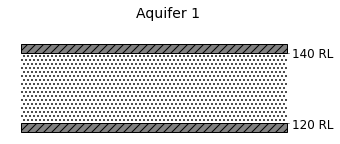

In [23]:
TW.aq.draw(dw=6)

## Radius of influence `.ri` method
Radius of influence is defined as the radius from within which a specified faction `.qf` of the pumped volume has been drawn. The default value for `qf` is 0.99, corresponding to the radius from which 99% of the pumped volume has been drawn.

The `.ri` method evaluates the radius of influence for each time supplied in a list of times `t` and by default displays a plot of the results. The plot can be suppressed by setting the method attribute `plot=False`. The method returns a pandas dataframe with time as the row index and radius of influence as the single column.

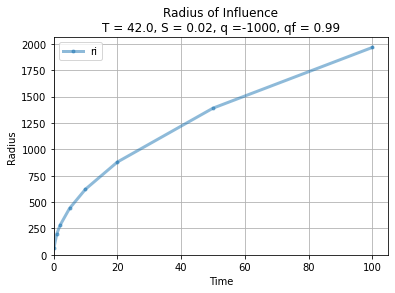

                ri
Time              
0.1      62.196004
1.0     196.681035
2.0     278.148987
5.0     439.792164
10.0    621.960043
20.0    879.584329
50.0   1390.744936
100.0  1966.810351


In [24]:
TIMES = [0.1, 1, 2, 5, 10, 20, 50, 100]
RI = TW.ri(t=TIMES)
print(RI)

Change the value of `qf` and re-evaluate the radius of influence.

In [25]:
TW.qf = 0.75
RI = TW.ri(t=TIMES, plot=False)
print(RI)

                ri
Time              
0.1      34.124584
1.0     107.911411
2.0     152.609781
5.0     241.297251
10.0    341.245844
20.0    482.594501
50.0    763.048905
100.0  1079.114110


Since the results are returned in a pandas dataframe they can be presented in user-customised plots using the pandas `.plot` method.

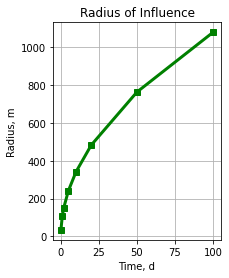

In [26]:
P1 = RI.plot(
    figsize=(3, 4),
    grid=True,
    color='green',
    lw = 3,
    marker='s',
    xlabel='Time, d',
    ylabel='Radius, m',
    title='Radius of Influence',
    legend=None
)

Results can be exported to a csv or Excel file, or both. Export of results occurs if non-blank strings are set for the `.csv` or `.xlsx` attributes. File names are supplied with or without file extentions, which will be added if they are ommitted.

In [27]:
OFILE = os.path.join('output', 'ri_result')
RI = TW.ri(t=TIMES, csv=OFILE, xlsx=OFILE, plot=False)

Results exported to: output/ri_result.csv
Results exported to: output/ri_result.xlsx


## Time drawdown `.dd` method
The `.dd` method calculates drawdown at each radius and at each time supplied. Radius values and times are specified as lists. The results plot can be suppressed by setting `plot=False`. The method returns a pandas dataframe with time as the row index and radius values as the columns.

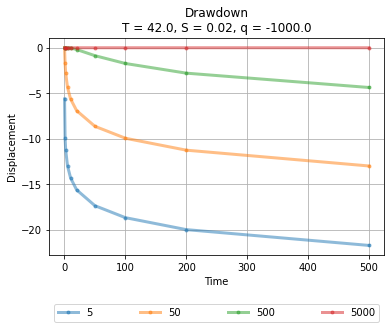

              r5        r50           r500          r5000
Time                                                     
0.1    -5.621300  -0.025483 -3.532792e-132  -0.000000e+00
1.0    -9.933674  -1.727185  -7.320307e-15  -0.000000e+00
2.0   -11.244165  -2.787720  -4.125710e-08  -0.000000e+00
5.0   -12.978571  -4.363143  -7.205778e-04 -9.851495e-262
10.0  -14.291315  -5.621300  -2.548347e-02 -3.532792e-132
20.0  -15.604340  -6.906725  -1.928961e-01  -2.984458e-67
50.0  -17.340268  -8.625993  -8.692190e-01  -4.414357e-28
100.0 -18.653519  -9.933674  -1.727185e+00  -7.320307e-15
200.0 -19.966798 -11.244165  -2.787720e+00  -4.125710e-08
500.0 -21.702879 -12.978571  -4.363143e+00  -7.205778e-04


In [28]:
RAD = [5, 50, 500, 5000]
TIM = [0.1, 1, 2, 5, 10, 20, 50, 100, 200, 500]
DD = TW.dd(r=RAD, t=TIM)
print(DD)

Customised user plot can be created using the returned Pandas dataframe and `.plot` method.

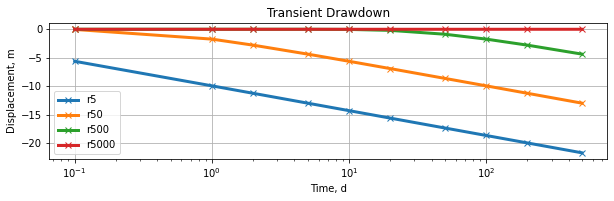

In [29]:
P2 = DD.plot(
    figsize=(10, 2.5),
    logx=True,
    grid=True,
    marker='x',
    lw=3,
    xlabel='Time, d',
    ylabel='Displacement, m',
    title='Transient Drawdown'
)

Drawdown results can be exported to .csv and .xlsx files by setting the `.csv` and `.xlsx` attributes to non-blank strings. File names are supplied with or without file extentions, which will be added if they are ommitted.

In [30]:
OFILE = os.path.join('output', 'dd_results')
DD = TW.dd(r=RAD, t=TIM, csv=OFILE, xlsx=OFILE, plot=False)

Results exported to: output/dd_results.csv
Results exported to: output/dd_results.xlsx


## Gridded drawdown `.dd_grid` method
The `dd_grid` method evaluates drawdown on a grid of points for specified time `t` and well rate `q`. The default well rate is -1000.0. The method returns drawdown in a Pandas dataframe with columns x, y and drawdown. A plot of results is displayed as default and can be suppressed by setting `plot=False`.

Unless otherwise specified, the solution uses the default well grid with radius 100 and grid density 21 (441 grid points consisting of 21 rows and 21 columns). Other values can be specified via the grid object of the solution using the `gr` and `gd` attributes.

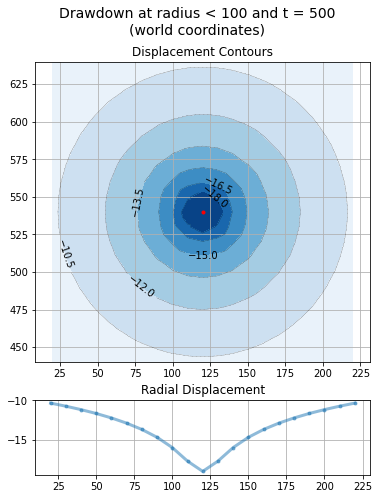

In [31]:
DDG = TW.dd_grid(t=500)

The grid is accessed via the the `.grid` attribute of the solution object.

WELL GRID INFORMATION
---------------------
Grid radius: 100
Number of grid points: 441
Grid density: 21



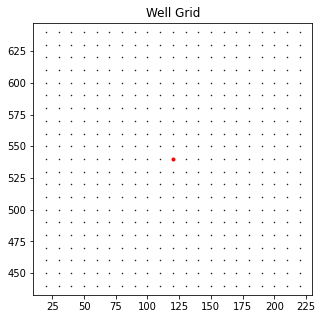

In [32]:
TW.grid.info()
TW.grid.draw()

Change the soultion parameters and refine the grid density for contouring.

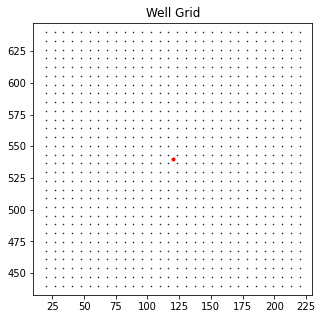

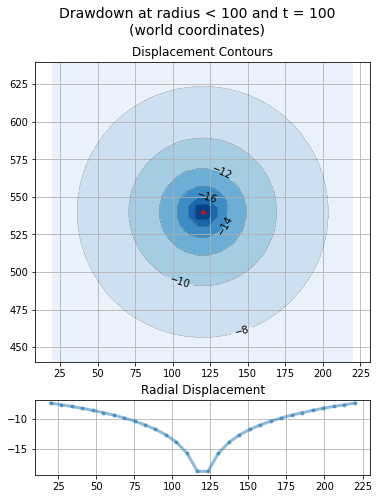

In [33]:
TW.grid.gr = 100
TW.grid.gd = 30
TW.grid.draw()
DDG = TW.dd_grid(t=100)

Evaluate the solution in local coordinates (well at position 0, 0).

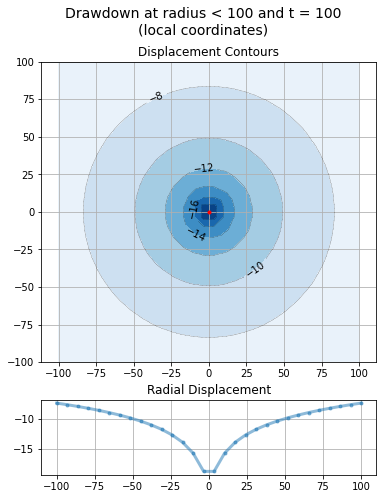

In [34]:
DDG = TW.dd_grid(t=100, local=True)

Drawdown results can be exported to .csv and .xlsx files by setting the `.csv` and `.xlsx` attributes to non-blank strings. File names are supplied with or without file extentions, which will be added if they are ommitted.

In [35]:
OFILE = os.path.join('output', 'dd_grid_results')
DDG = TW.dd_grid(t=100, csv=OFILE, xlsx=OFILE, plot=False)

Results exported to: output/dd_grid_results.csv
Results exported to: output/dd_grid_results.xlsx
